In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import cPickle as pickle

In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3.data_to_piechart'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir)), os.listdir(subdir)
        
        classifier = subdir.split('/')[-1]
        dataset = subdir.split('/')[-2]
        experiment = subdir.split('/')[-3]
        
        print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [7]:
for subdir, _, _ in os.walk(RESULTS_DIR+'C.Figure3.data_to_barchart'):
#     print subdir
    if len(subdir.split('/')) == 8:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [8]:
experiment = 'C.Figure3.data_to_barchart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

bar_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    bar_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [58]:
len(bar_stats[3][0])

4

In [9]:
experiment = 'C.Figure3.data_to_piechart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

pie_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    pie_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

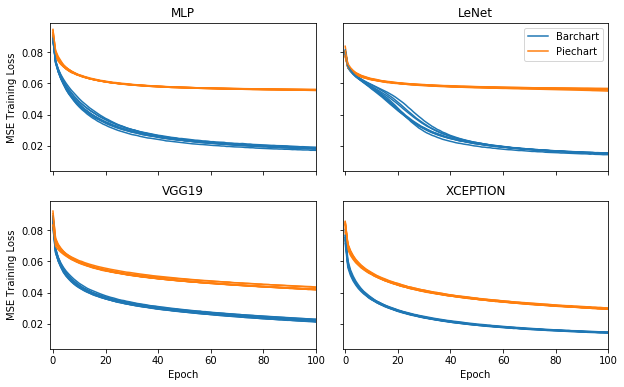

In [146]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[0][0])):
        
        # grab sample from both
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Barchart', color='C0')
            plot(pie_loss, label='Piechart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()

In [28]:
bar_stats[i]

[[]]

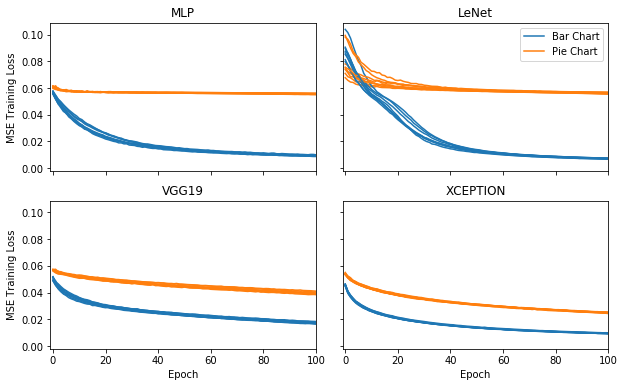

In [147]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[0][0])):
        
        # grab sample from both
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['val_loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['val_loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Bar Chart', color='C0')
            plot(pie_loss, label='Pie Chart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()

In [112]:
len(bar_stats[0][0])

8

In [113]:
bar_stats[0][0][0]['MLAE']

2.4947385390539498

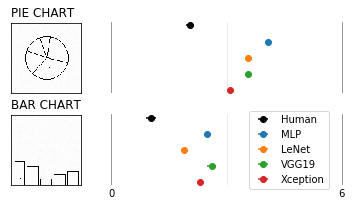

In [38]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

titles = ['Pie Chart', 'Bar Chart']

#
# human values
#
human_values = [(2.05, 0.115),\
                (1.035, 0.125)]
human_values.append((np.mean([v[0] for v in human_values]), np.mean([v[1] for v in human_values])))



## data
no_samples = len(bar_stats[0][0])
bar_data = [None]*4
pie_data = [None]*4
classifiers = ['MLP', 'LeNet', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    bar_mlae_s = []
    pie_mlae_s = []
    
    for sample in range(no_samples):

        # grab sample from both
        bar_mlae = bar_stats[i][0][sample]['MLAE']
        pie_mlae = pie_stats[i][0][sample]['MLAE']
#         print i, sample, bar_mlae, pie_mlae
        bar_mlae_s.append(bar_mlae)
        pie_mlae_s.append(pie_mlae)
        
    bar_data[i] = bar_mlae_s
    pie_data[i] = pie_mlae_s
    
all_data = [pie_data, bar_data]

## images
data, labels = C.Figure3.generate_datapoint()
bar_image = C.Figure3.data_to_barchart(data)
pie_image = C.Figure3.data_to_piechart(data)

bar_image = bar_image.astype(np.float32)
bar_image += np.random.uniform(0, 0.05,(100,100))

pie_image = pie_image.astype(np.float32)
pie_image += np.random.uniform(0, 0.05,(100,100))
images = [pie_image, bar_image]



fig = plt.figure(figsize=(6,3), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[.3,1], hspace=.3)

j = 0 # grid index (running)

rows = 2
for row in range(rows):
    
    for i, c in enumerate(['Image', 'Human']+classifiers):
        

        
        if i==0:
            # this is the image

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

#         if row == 0:
#             plt.title(c)

        if i==1:

            fig = plt.subplot(gs[j])
            j += 1
        
#             if row > 4:
#                 continue
        
            # this is human
            means = human_values[row][0]
            confidence = human_values[row][1]
            
            errorbars = plt.errorbar(means, 6-i, xerr=confidence, fmt='o',  color='black', label='Human')
            continue

    
        data = [all_data[row][i-2]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = 6-i#range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', label=c)
plt.legend(loc='right', bbox_to_anchor=(0.95, 0.5))
plt.savefig('../PAPER/gfx/figure3_mlae_better.pdf', bbox_inches='tight', pad_inches=0)